# SQL Speed Drills

In [1]:
import pandas as pd
import sqlite3 as sq

df = pd.read_csv('../../data/raw/listings.csv')
df.columns.tolist()

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'source',
 'name',
 'description',
 'neighborhood_overview',
 'picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'latitude',
 'longitude',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bathrooms_text',
 'bedrooms',
 'beds',
 'amenities',
 'price',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'calendar_updated',
 'has_availability',
 'availability_30

In [2]:
conn = sq.connect(':memory:')
df.to_sql('austin_housing', conn, index=False)

test = """SELECT *
    FROM austin_housing"""
result = pd.read_sql(test, conn)
result.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,5456,https://www.airbnb.com/rooms/5456,20250613040113,2025-06-13,city scrape,"Walk to 6th, Rainey St and Convention Ctr",Great central location for walking to Convent...,My neighborhood is ideally located if you want...,https://a0.muscache.com/pictures/14084884/b5a3...,8028,...,4.82,4.73,4.79,None,f,1,1,0,0,3.59
1,5769,https://www.airbnb.com/rooms/5769,20250613040113,2025-06-13,city scrape,NW Austin Room,None,Quiet neighborhood with lots of trees and good...,https://a0.muscache.com/pictures/23822033/ac94...,8186,...,4.94,4.77,4.92,None,f,1,0,1,0,1.65
2,6413,https://www.airbnb.com/rooms/6413,20250613040113,2025-06-14,previous scrape,Gem of a Studio near Downtown,"Great studio apartment, perfect a single perso...",Travis Heights is one of the oldest neighborho...,https://a0.muscache.com/pictures/hosting/Hosti...,13879,...,4.98,4.87,4.93,None,f,1,1,0,0,0.65
3,6448,https://www.airbnb.com/rooms/6448,20250613040113,2025-06-13,city scrape,"Secluded Studio @ Zilker - King Bed, Bright & ...","Clean, private space with everything you need ...",The neighborhood is fun and funky (but quiet)!...,https://a0.muscache.com/pictures/airflow/Hosti...,14156,...,4.98,4.97,4.88,None,t,1,1,0,0,2.02
4,8502,https://www.airbnb.com/rooms/8502,20250613040113,2025-06-13,city scrape,Woodland Studio Lodging,Studio rental on lower level of home located i...,None,https://a0.muscache.com/pictures/miso/Hosting-...,25298,...,4.88,4.69,4.63,None,f,1,1,0,0,0.29


## Task 1
**Business Question:**
*"Show me the average price for listings that have at least 10 reviews, grouped by neighbourhood, sorted from most expensive to least expensive."*
Your task:
Write a SQL query that:
- Filters for listings with number_of_reviews >= 10
- Groups by neighbourhood_cleansed
- Calculates average price for each neighbourhood
- Sorts results by average price (highest to lowest)

In [3]:
task1_query = """SELECT neighbourhood_cleansed,
    AVG(CAST(REPLACE(price, '$', '') AS REAL)) as avg_price
FROM austin_housing
WHERE number_of_reviews >= 10
    AND price IS NOT NULL  -- Filter out None values
GROUP BY neighbourhood_cleansed
ORDER BY avg_price DESC"""

task1_result = pd.read_sql(task1_query, conn)
task1_result.head(5)

,neighbourhood_cleansed,avg_price
0,78746,337.877778
1,78732,294.193548
2,78734,265.938095
3,78736,255.775510
4,78726,246.166667


## Task 2
**Business Question:**
*"Show me neighbourhoods that have at least 20 listings, where the average listing accommodates 4+ people. For each neighbourhood, show: count of listings, average price, average number of accommodates, and average review score. Sort by average price from highest to lowest."*
Your task:
Write a SQL query that:

Groups by neighbourhood_cleansed
Calculates 4 aggregations:

COUNT of listings
AVG of price (remember to clean it)
AVG of accommodates
AVG of review_scores_rating


Uses HAVING to filter for:

At least 20 listings in the group
Average accommodates >= 4


Sorts by average price (highest to lowest)

Hints:

HAVING comes after GROUP BY, before ORDER BY
You can reference aggregated columns in HAVING
Watch for NULL values in review_scores_rating

Try first. Paste your query + results when done (or tell me where you're stuck).RetryClaude can make mistakes. Please double-check responses.AI

In [4]:
task2_query = """SELECT neighbourhood_cleansed,
    COUNT(listing_url) as total_listings,
    AVG(CAST(REPLACE(price, '$','') AS REAL)) as avg_price,
    AVG(accommodates) as avg_accommodates,
    AVG(review_scores_rating)
    FROM austin_housing
    GROUP BY neighbourhood_cleansed
    HAVING total_listings >= 20 AND avg_accommodates >=4
    ORDER BY avg_price DESC
"""

task2_result = pd.read_sql(task2_query, conn)
task2_result.head(5)

,neighbourhood_cleansed,total_listings,avg_price,avg_accommodates,AVG(review_scores_rating)
0,78746,272,275.873684,6.801471,4.831302
1,78734,381,269.618243,7.076115,4.835323
2,78733,95,254.402597,6.652632,4.883067
3,78737,204,247.165680,7.955882,4.906359
4,78731,149,242.869565,4.993289,4.877297


## Task 3 (Complex Business Scenario)
**Business Question:**
*"I'm an investor looking for high-occupancy, well-reviewed properties in active markets. Show me neighbourhoods where:*

*There are at least 50 listings (active market)*
*Average occupancy estimate is above 60% (estimated_occupancy_l365d)*
*Average review score is above 4.5*
*Properties accommodate 2-6 people (typical travelers)*

*For each qualifying neighbourhood, show me the count of listings, average price, average occupancy, and average review score. Sort by average occupancy (highest to lowest)."*
Your task:
Translate this business logic into SQL. Think through:

What goes in WHERE vs HAVING?
Which columns need aggregation vs filtering?

Try without hints first. This one requires combining everything from Tasks 1-2.

In [5]:
task3_query = """SELECT neighbourhood_cleansed,
    COUNT(listing_url) as total_listings,
    AVG(CAST(REPLACE(price, '$','') AS REAL)) as avg_price,
    AVG(estimated_occupancy_l365d) as avg_occupancy,
    AVG(accommodates) as avg_accommodates,
    AVG(review_scores_rating) as avg_review_score
    FROM austin_housing
    WHERE accommodates BETWEEN 2 AND 6
    GROUP BY neighbourhood_cleansed
    HAVING total_listings >= 50 
    AND avg_occupancy >=60 
    AND avg_review_score > 4.5
    ORDER BY avg_occupancy DESC 
"""

task3_result = pd.read_sql(task3_query, conn)
task3_result.head(3)

,neighbourhood_cleansed,total_listings,avg_price,avg_occupancy,avg_accommodates,avg_review_score
0,78735,53,78.342105,88.924528,4.037736,4.712273
1,78756,156,129.425000,81.615385,3.782051,4.837068
2,78702,1234,153.827500,80.935981,3.713128,4.873870


## Correlation Matrix - Visual Pattern Recognition

In [6]:
# Select numeric columns you want to compare
cols = ['price', 'accommodates', 'bedrooms', 'beds', 
        'number_of_reviews', 'review_scores_rating']

# Clean price first
df['price_clean'] = df['price'].str.replace('$', '').str.replace(',','').astype(float)

# Create correlation matrix
correlation_matrix = df[['price_clean', 'accommodates', 'bedrooms', 
                          'beds', 'number_of_reviews', 'review_scores_rating']].corr()

# Display it
correlation_matrix

,price_clean,accommodates,bedrooms,beds,number_of_reviews,review_scores_rating
price_clean,1.000000,0.039331,0.033219,0.038925,-0.043214,-0.011331
accommodates,0.039331,1.000000,0.831982,0.782943,0.005262,0.039184
bedrooms,0.033219,0.831982,1.000000,0.780582,-0.060710,0.073039
beds,0.038925,0.782943,0.780582,1.000000,-0.013671,0.044208
number_of_reviews,-0.043214,0.005262,-0.060710,-0.013671,1.000000,0.068021
review_scores_rating,-0.011331,0.039184,0.073039,0.044208,0.068021,1.000000


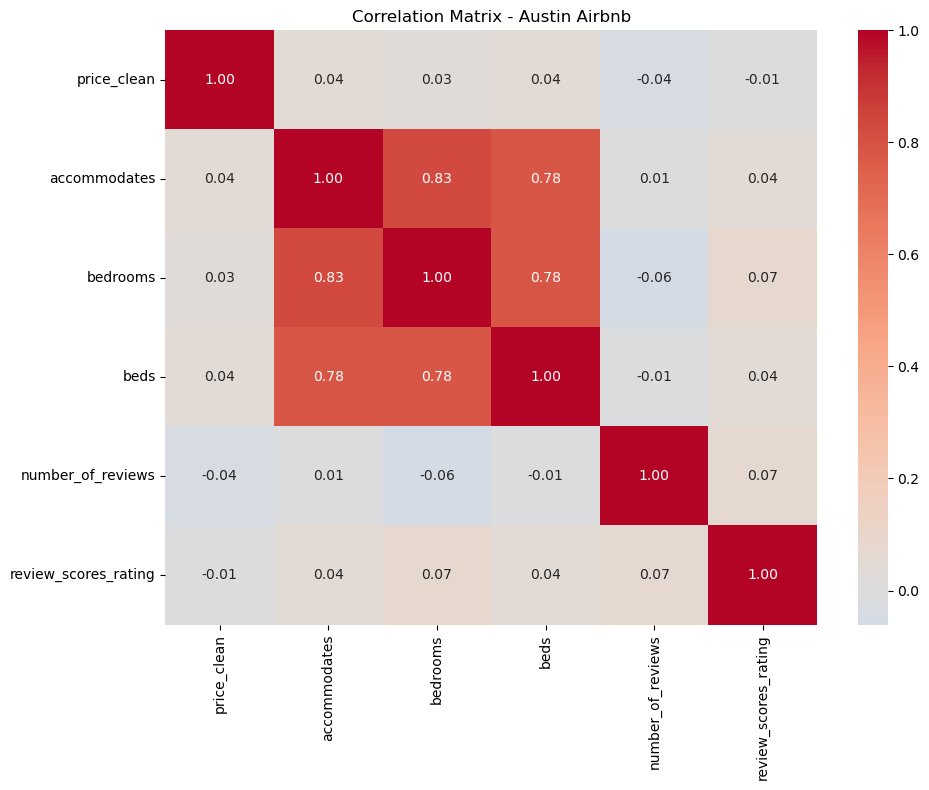

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            annot=True,           # Show numbers
            cmap='coolwarm',      # Red = positive, Blue = negative
            center=0,             # White = zero correlation
            fmt='.2f')            # 2 decimal places

plt.title('Correlation Matrix - Austin Airbnb')
plt.tight_layout()
plt.savefig('../../visuals/correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

1. Which two variables have the STRONGEST positive correlation? (darkest red, highest number besides 1.00)
   bedrooms:accommodates
2. Does price correlate strongly with anything? (look at price row/column)
   according to this data, none of the variables form a strong correlation with price
3. Do more reviews = higher ratings? (look where number_of_reviews meets review_scores_rating)
    no meaningul correlation detected
   